In [1]:
!pip install sklearn


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.4/7.4 MB 27.6 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 kB 9.6 MB/s eta 0:00:00
     --------------------------------------- 38.6/38.6 MB 25.2 MB/s eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


In [16]:
!pip install seaborn

     -------------------------------------- 292.8/292.8 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 33.0 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 35.1 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 2.8 MB/s eta 0:00:00
     ------------------------------------- 950.4/950.4 kB 30.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install numpy


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

In [26]:
features_for_mood = ['energy', 'liveness', 'tempo', 'speechiness',
                                     'acousticness', 'instrumentalness', 'danceability', 'duration_ms',
                                     'loudness', 'valence']

In [27]:
data = pd.read_csv('tracks_data.csv')
hyper_opt = False

In [44]:
#split into trainval and test
trainx, testx, trainy, testy = train_test_split(data[features_for_mood], data['mood'], test_size = 0.10,
                                                random_state = 42, stratify=data['mood'])

In [45]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(trainx)

In [46]:
nn = MLPClassifier(max_iter = 15000, alpha=1.0, hidden_layer_sizes=8)
scores = cross_val_score(nn, train_scaled, trainy, cv=5)
print ("cv score: " + str(scores.mean()))

cv score: 0.5606060606060606


In [47]:
if hyper_opt:
    params = {"alpha": np.logspace(-4, 2, 7), 'hidden_layer_sizes': [1, 2, 5, 10, 20, 50, 100]}
    clf = GridSearchCV(nn, params)
    clf.fit(train_scaled, trainy)
    print("hyperparam optimized score : " + str(clf.best_score_))
    import pdb
    pdb.set_trace()

In [48]:
from sklearn.model_selection import cross_validate

In [49]:
results = cross_validate(nn, train_scaled, trainy, return_train_score=True)

In [50]:
results

{'fit_time': array([0.6208055 , 0.49219489, 0.38385558, 0.41165972, 0.54640508]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.56060606, 0.51515152, 0.5       , 0.59090909, 0.62121212]),
 'train_score': array([0.67424242, 0.67424242, 0.67424242, 0.66287879, 0.67424242])}

In [51]:
nn = MLPClassifier(hidden_layer_sizes=8, max_iter=15000, alpha=1.0)

In [52]:
nn.fit(train_scaled, trainy)
test_preds = nn.predict(scaler.transform(testx))
accuracy_score(test_preds, testy)

0.5675675675675675

In [53]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [54]:
conf_matrix = confusion_matrix(testy, test_preds, labels = data['mood'].unique().tolist())

In [55]:
labels = data['mood'].unique().tolist()

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)

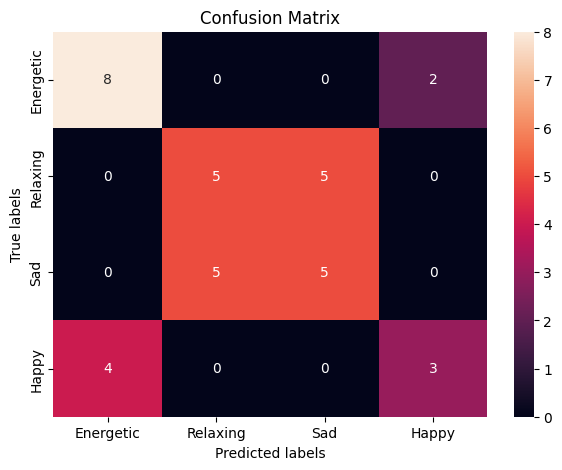

In [57]:
plt.rcParams['figure.figsize'] = (7,5)
ax = plt.subplot()
sn.heatmap(conf_matrix, annot=True)
#labels = data['mood'].tolist()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [58]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(nn, train_scaled, trainy, cv=5)

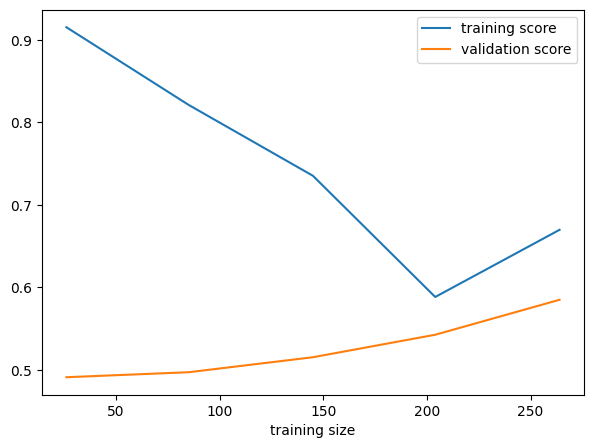

In [59]:
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='training score')
plt.plot(train_sizes, val_scores_mean, label='validation score')
plt.xlabel('training size')
plt.legend()